In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
import numpy as np
import pandas as pd

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
import time
import random

plt.style.use("dark_background")

In [33]:
BASE_PATH= "/data1/icmr/shreyasi/MRI_Image/kaggle_data/kaggle_3m"
BASE_LEN = 97
END_LEN = 4
END_MASK_LEN = 9

IMG_SIZE = 512

In [34]:
s ="/data1/icmr/shreyasi/MRI_Image/kaggle_data/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_"

In [35]:
len(s)

97

In [36]:
data =[]
for dir_ in os.listdir(BASE_PATH):
    dir_path = os.path.join(BASE_PATH,dir_)
    if os.path.isdir(dir_path):
        for filename in os.listdir(dir_path):
            img_path = os.path.join(dir_path, filename)
            data.append([dir_, img_path])
    else:
        print(f"[INFO] This is not a dir --> {dir_path}")
        
df = pd.DataFrame(data, columns=["dir_name", "image_path"])

[INFO] This is not a dir --> /data1/icmr/shreyasi/MRI_Image/kaggle_data/kaggle_3m/data.csv
[INFO] This is not a dir --> /data1/icmr/shreyasi/MRI_Image/kaggle_data/kaggle_3m/README.md


In [37]:
df.head()

,dir_name,image_path
0,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
1,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
2,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
3,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
4,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...


In [38]:
df_imgs = df[~df["image_path"].str.contains("mask")]
df_masks = df[df["image_path"].str.contains("mask")]

In [39]:
imgs = sorted(df_imgs["image_path"].values, key= lambda x: int(x[BASE_LEN: -END_LEN]))
masks = sorted(df_masks["image_path"].values, key=lambda x: int(x[BASE_LEN: -END_MASK_LEN]))

In [40]:
(df_imgs['image_path'][0])

'/data1/icmr/shreyasi/MRI_Image/kaggle_data/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif'

In [41]:
idx = random.randint(0,len(imgs)-1)
imgs[idx],masks[idx]

('/data1/icmr/shreyasi/MRI_Image/kaggle_data/kaggle_3m/TCGA_HT_8107_19980708/TCGA_HT_8107_19980708_3.tif',
 '/data1/icmr/shreyasi/MRI_Image/kaggle_data/kaggle_3m/TCGA_HT_8107_19980708/TCGA_HT_8107_19980708_3_mask.tif')

In [42]:
dff = pd.DataFrame({"patient": df_imgs.dir_name.values,
                   "image_path": imgs,
                   "mask_path": masks})

dff.head()

,patient,image_path,mask_path
0,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
1,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
2,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
3,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...
4,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...


In [43]:
def check_patient(mask_path):
    val =np.max(cv2.imread(mask_path))
    if val >0 :
        return 1
    return 0

In [44]:
dff["diagnosis"] = dff["mask_path"].apply(lambda x: check_patient(x))

dff.head()

,patient,image_path,mask_path,diagnosis
0,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
1,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
2,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
3,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
4,TCGA_CS_4941_19960909,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0


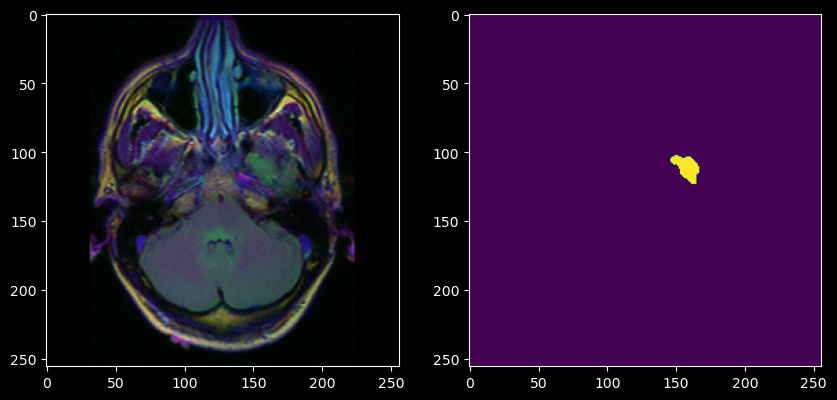

In [45]:
img_test =[]
mask_test =[]
for i in range(len(dff)):
    idx=0
    if dff.iloc[i,3]==1:
        image = cv2.imread(dff.iloc[i, 1],1)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        mask = cv2.imread(dff.iloc[i, 2], 0)
        fig,ax = plt.subplots(1,2,figsize=(10,10))
        img_test =np.array(image)
        mask_test = np.array(mask)
        ax[0].imshow(image,cmap='gray')
        ax[1].imshow(mask)
        break

In [46]:
import ipywidgets

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch import ToTensorV2

from sklearn.model_selection import train_test_split

In [48]:
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
    y_indices, x_indices = np.where(ground_truth_map > 0)
    if len(x_indices)==0:
        
        return [0,0,0,0]
    
    x_min, x_max = np.min(x_indices), np.max(x_indices)
    y_min, y_max = np.min(y_indices), np.max(y_indices)
    # add perturbation to bounding box coordinates
    H, W = ground_truth_map.shape
    x_min = max(0, x_min - np.random.randint(0, 20))
    x_max = min(W, x_max + np.random.randint(0, 20))
    y_min = max(0, y_min - np.random.randint(0, 20))
    y_max = min(H, y_max + np.random.randint(0, 20))
    bbox = [x_min, y_min, x_max, y_max]

    return bbox

In [49]:
class SAMDataset(Dataset):
    def __init__(self,df,processor):
        self.df = df
        self.processor = processor
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        image = cv2.imread(self.df.iloc[idx, 1])
        mask = cv2.imread(self.df.iloc[idx, 2], 0)
        ground_truth_mask = np.array(mask)
        prompt = get_bounding_box(ground_truth_mask)
        # prepare image and prompt for the model
        inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

        # remove batch dimension which the processor adds by default
        inputs = {k:v.squeeze(0) for k,v in inputs.items()}

        # add ground truth segmentation
        inputs["ground_truth_mask"] = ground_truth_mask

        return inputs


In [50]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

/home/icmr/anaconda3/envs/samyolo/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [51]:
train_df, val_df = train_test_split(dff, stratify=dff.diagnosis, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
train_df, test_df = train_test_split(train_df, stratify=train_df.diagnosis, test_size=0.12)
train_df = train_df.reset_index(drop=True)
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (3111, 4) 
Val: (393, 4) 
Test: (425, 4)


In [52]:
train_df

,patient,image_path,mask_path,diagnosis
0,TCGA_CS_6668_20011025,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
1,TCGA_DU_8163_19961119,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
2,TCGA_DU_6408_19860521,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,1
3,TCGA_DU_7018_19911220,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,1
4,TCGA_HT_7690_19960312,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
...,...,...,...,...
3106,TCGA_DU_8168_19970503,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
3107,TCGA_HT_8563_19981209,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,1
3108,TCGA_HT_7686_19950629,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0
3109,TCGA_CS_6667_20011105,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,/data1/icmr/shreyasi/MRI_Image/kaggle_data/kag...,0


In [53]:
train_dataset = SAMDataset(train_df,processor)
val_dataset = SAMDataset(val_df,processor)
test_dataset =SAMDataset(test_df,processor)
example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [54]:
batch_size = 4
lr =1e-4

In [55]:
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,drop_last=False)
val_loader = DataLoader(val_dataset,batch_size=batch_size,shuffle=True,drop_last=False)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True,drop_last=False)

In [56]:
example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [57]:
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
    if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
        param.requires_grad_(False)

/home/icmr/anaconda3/envs/samyolo/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [58]:
from torch.optim import Adam
import monai
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [60]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 3

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_loader):
        
        
      # forward pass
        outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float().to(device)
        loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # backward pass (compute gradients of parameters w.r.t. loss)
        optimizer.zero_grad()
        loss.backward()

        # optimize
        optimizer.step()
        epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

100%|██████████| 778/778 [15:35<00:00,  1.20s/it]


EPOCH: 0
Mean loss: -18049.055729301544


100%|██████████| 778/778 [19:35<00:00,  1.51s/it]


EPOCH: 1
Mean loss: -75436.15472323728


100%|██████████| 778/778 [19:18<00:00,  1.49s/it]

EPOCH: 2
Mean loss: -193973.7790698259


In [61]:
path = "/data1/icmr/shreyasi/"
if not os.path.exists(path):
    os.makedirs(path)

checkpoints_path = "/data1/icmr/shreyasi/model.pth"
torch.save(model.state_dict(), checkpoints_path)

In [62]:
from transformers import SamModel, SamConfig, SamProcessor
import torch
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Create an instance of the model architecture with the loaded configuration
my_mito_model = SamModel(config=model_config)
#Update the model by loading the weights from saved file.
my_mito_model.load_state_dict(torch.load(checkpoints_path))

device = "cuda:0" if torch.cuda.is_available() else "cpu"
my_mito_model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

(256, 256)


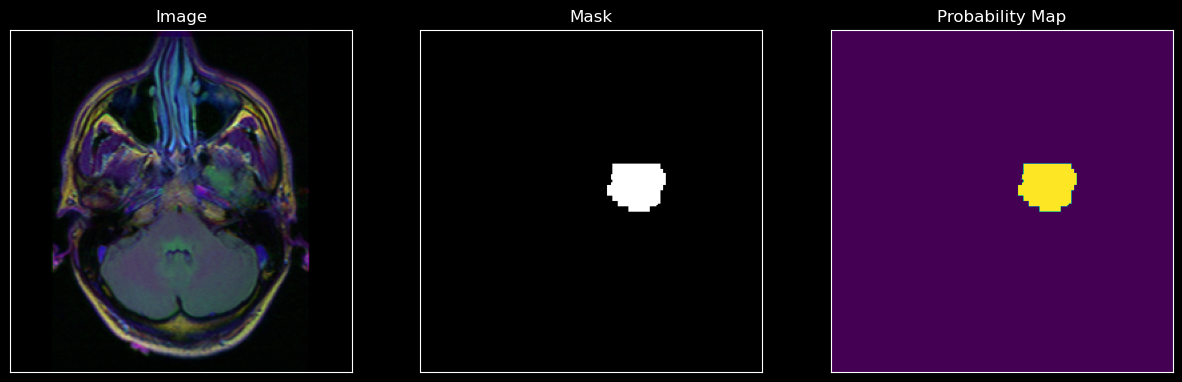

In [63]:
prompt = get_bounding_box(mask_test)
inputs = processor(img_test, input_boxes=[[prompt]], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}
model.eval()

# compute loss
with torch.no_grad():
    outputs = my_mito_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)
print(medsam_seg.shape)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(img_test), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")


# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side

plt.show()

In [215]:
img_test_yolo = cv2.imread('/data1/icmr/shreyasi/brain_tumor_object_detection/predict/080124AIIMSD00001/patient1_slice1160.jpeg')
img_test_yolo = cv2.cvtColor(img_test_yolo,cv2.COLOR_BGR2RGB)
    

In [228]:
import glob

In [230]:
test_imgs = []
for img in glob.glob("/data1/icmr/shreyasi/brain_tumor_object_detection/predict/080124AIIMSD00001/*.jpeg"):
    n= cv2.imread(img)
    test_imgs.append(n)

In [231]:
test_imgs

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [216]:
np.min(img_test_yolo), np.max(img_test_yolo)

(0, 255)

In [217]:
labels = pd.read_csv('/data1/icmr/shreyasi/brain_tumor_object_detection/yolov5/runs/detect/exp/labels/patient1_slice1160.txt', header = None, delim_whitespace= True)
labels

,0,1,2,3,4
0,0,0.464844,0.410156,0.189453,0.203125


In [218]:
np.min(img_test), np.max(img_test)

(0, 255)

In [219]:
x=labels.iloc[0][1:].tolist()
x

[0.464844, 0.410156, 0.189453, 0.203125]

In [ ]:
# x_min = max(0, x_min - np.random.randint(0, 20))
# x_max = min(W, x_max + np.random.randint(0, 20))
# y_min = max(0, y_min - np.random.randint(0, 20))
# y_max = min(H, y_max + np.random.randint(0, 20))

In [220]:
pts =[x[0]-x[2]/2, x[1]-x[3]/2,x[0]+x[2]/2,x[1]+x[3]/2]

In [221]:
x_min,y_min, x_max,y_max = [int(pt*1024) for pt in pts]

In [222]:
x_min,y_min, x_max,y_max

(379, 315, 573, 523)

In [223]:
img_test_yolo.shape

(1024, 1024, 3)

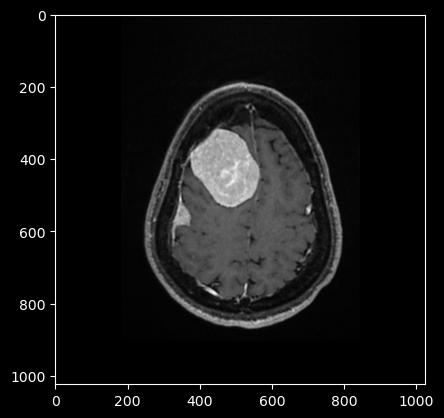

In [224]:
plt.imshow(img_test_yolo)

In [211]:
# bounding_box = np.array([[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]])

In [225]:
img_test_yolo_with_bb = cv2.rectangle(img_test_yolo, ((x_min), (y_min)), ((x_max), (y_max)), color=(0, 255, 0), thickness=2)
#cv2.rectangle(img, start_point, end_point, color=(0,0,0), thickness=1)

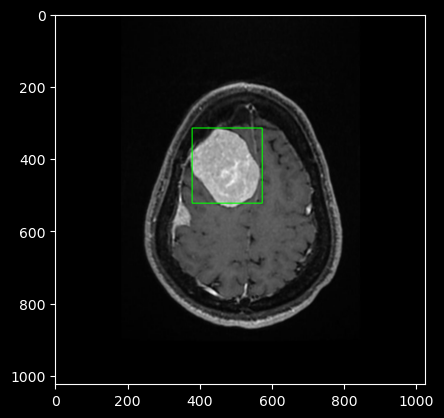

In [226]:
plt.imshow( img_test_yolo_with_bb)


In [102]:
# type(x_min)

int

In [105]:
# import torchvision
# from torchvision.io import read_image 
# from torchvision.utils import draw_bounding_boxes

In [106]:
#img_test_yolo = read_image('/data1/icmr/shreyasi/brain_tumor_object_detection/predict/080124AIIMSD00001/patient1_slice52.jpeg')

In [107]:
# box = [x_min,y_min, x_max, y_max] 
# box = torch.tensor(box) 
# box = box.unsqueeze(0) 

In [108]:
# img_test_yolo = draw_bounding_boxes(img_test_yolo, box, width=5, 
#                           colors="green",  
#                           fill=True) 

In [124]:
# img_test_yolo = torchvision.transforms.ToPILImage()(img_test_yolo) 
# img_test_yolo.show()

In [123]:
# from PIL import Image

(256, 256)


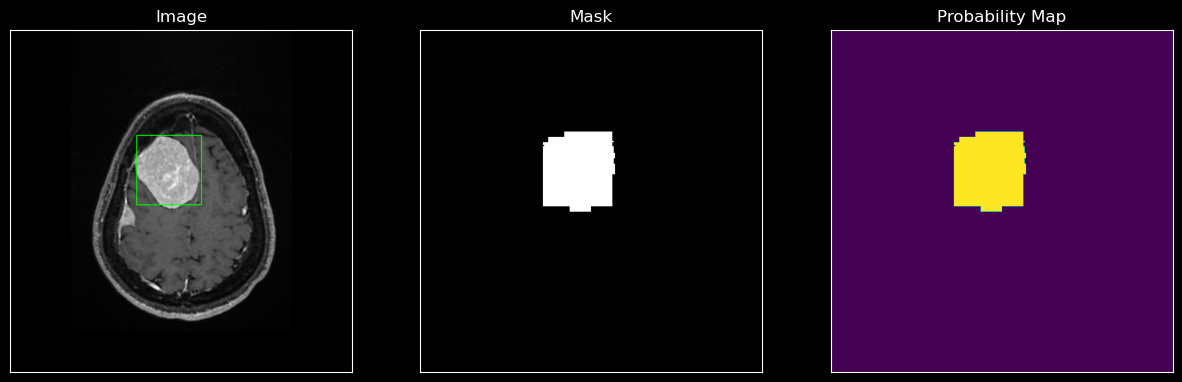

In [227]:
prompt = [x_min,y_min, x_max,y_max]
#prompt = [int(p* 1024) for p in prompt]
inputs = processor(img_test_yolo, input_boxes=[[prompt]], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}
model.eval()

# compute loss
with torch.no_grad():
    outputs = my_mito_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)
print(medsam_seg.shape)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(img_test_yolo), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")


# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side

plt.show()

In [250]:
np.unique(medsam_seg_prob)

array([0.0000000e+00, 1.9190684e-23, 1.0000000e+00], dtype=float32)

In [244]:
img_test_yolo = cv2.imread('/data1/icmr/shreyasi/brain_tumor_object_detection/predict/080124AIIMSD00001/patient1_slice2382.jpeg')
img_test_yolo = cv2.cvtColor(img_test_yolo,cv2.COLOR_BGR2RGB)
labels = pd.read_csv('/data1/icmr/shreyasi/brain_tumor_object_detection/yolov5/runs/detect/exp/labels/patient1_slice2382.txt', header = None, delim_whitespace= True)
labels
    

,0,1,2,3,4
0,1,0.579102,0.267578,0.095703,0.078125


In [245]:
img_test_yolo.shape

(512, 512, 3)

In [246]:
x=labels.iloc[0][1:].tolist()
x
pts =[x[0]-x[2]/2, x[1]-x[3]/2,x[0]+x[2]/2,x[1]+x[3]/2]

In [247]:
x_min,y_min, x_max,y_max = [int(pt*512) for pt in pts]

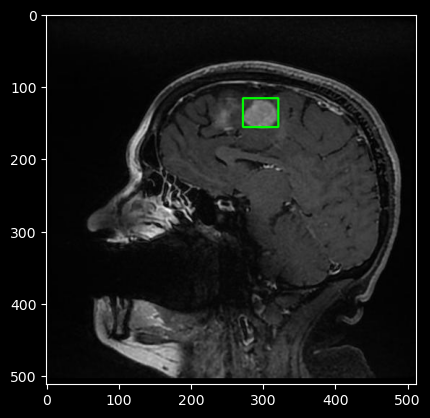

In [248]:
img_test_yolo_with_bb = cv2.rectangle(img_test_yolo, ((x_min), (y_min)), ((x_max), (y_max)), color=(0, 255, 0), thickness=2)
plt.imshow(img_test_yolo_with_bb)

(256, 256)


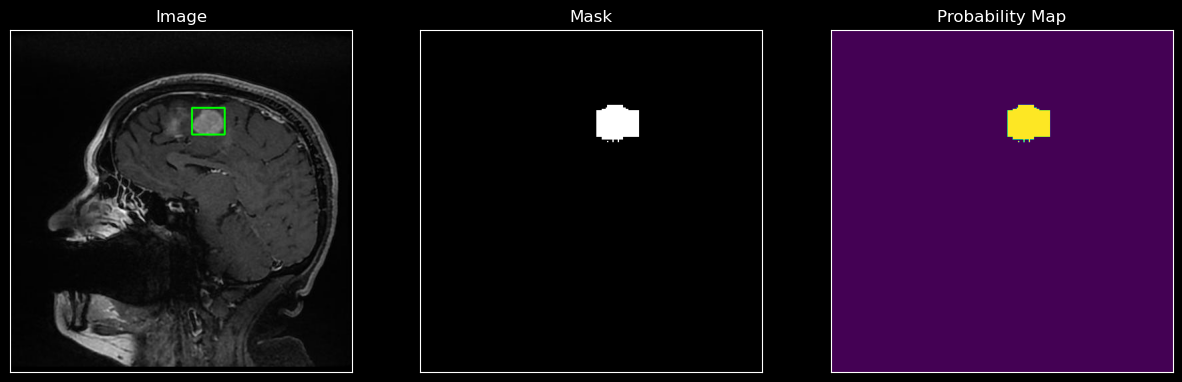

In [249]:
prompt = [x_min,y_min, x_max,y_max]
#prompt = [int(p* 1024) for p in prompt]
inputs = processor(img_test_yolo, input_boxes=[[prompt]], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}
model.eval()

# compute loss
with torch.no_grad():
    outputs = my_mito_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)
print(medsam_seg.shape)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(img_test_yolo), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")


# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side

plt.show()

In [251]:
img_test_yolo = cv2.imread('/data1/icmr/shreyasi/brain_tumor_object_detection/predict/080124AIIMSD00001/patient1_slice2742.jpeg')
img_test_yolo = cv2.cvtColor(img_test_yolo,cv2.COLOR_BGR2RGB)
labels = pd.read_csv('/data1/icmr/shreyasi/brain_tumor_object_detection/yolov5/runs/detect/exp/labels/patient1_slice2742.txt', header = None, delim_whitespace= True)
labels
    

,0,1,2,3,4
0,0,0.452637,0.411621,0.223633,0.231445


In [252]:
img_test_yolo.shape

(1024, 1024, 3)

In [253]:
x=labels.iloc[0][1:].tolist()
x
pts =[x[0]-x[2]/2, x[1]-x[3]/2,x[0]+x[2]/2,x[1]+x[3]/2]

In [254]:
x_min,y_min, x_max,y_max = [int(pt*1024) for pt in pts]

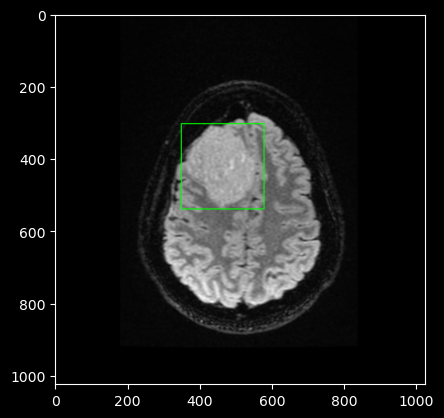

In [256]:
img_test_yolo_with_bb = cv2.rectangle(img_test_yolo, ((x_min), (y_min)), ((x_max), (y_max)), color=(0, 255, 0), thickness=2)
plt.imshow(img_test_yolo_with_bb)

(256, 256)


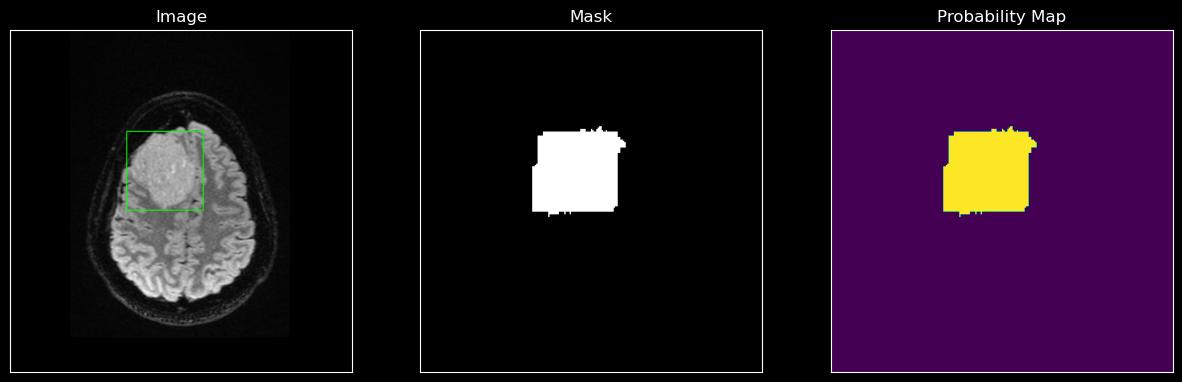

In [257]:
prompt = [x_min,y_min, x_max,y_max]
#prompt = [int(p* 1024) for p in prompt]
inputs = processor(img_test_yolo, input_boxes=[[prompt]], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}
model.eval()

# compute loss
with torch.no_grad():
    outputs = my_mito_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)
print(medsam_seg.shape)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(img_test_yolo), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")


# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side

plt.show()